# 1.2.5 旋度

## 计算普通函数的旋度

In [2]:
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display

# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义矢量场 A
# 假设 A = x^2 * i + y^2 * j + z * k
A = -N.y**2 * N.i + N.x**2 * N.j + N.z * N.k
print("矢量场 A:")
display(A)

# 计算矢量场的散度
curl_A = curl(A)

# 输出散度
print("矢量场的旋度 (∇×A):")
display(curl_A)

矢量场 A:


(-N.y**2)*N.i + N.x**2*N.j + N.z*N.k

矢量场的旋度 (∇×A):


(2*N.x + 2*N.y)*N.k

### 矢量场散度的例子：绕着中心打转的矢量场

In [4]:
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display
# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义矢量场 A
# 假设 A = x^2 * i + y^2 * j + z * k
A = -N.y * N.i + N.x * N.j + 0 * N.k
print("矢量场 A:")
display(A)

# 计算矢量场的散度
curl_A = curl(A)

# 输出散度
print("矢量场的旋度 (∇×A):")
display(curl_A)

矢量场 A:


(-N.y)*N.i + N.x*N.j

矢量场的旋度 (∇×A):


2*N.k

#### 绘出二维矢量图

矢量场：


(-N.y)*N.i + N.x*N.j

矢量场的旋度 (∇×A):


2*N.k

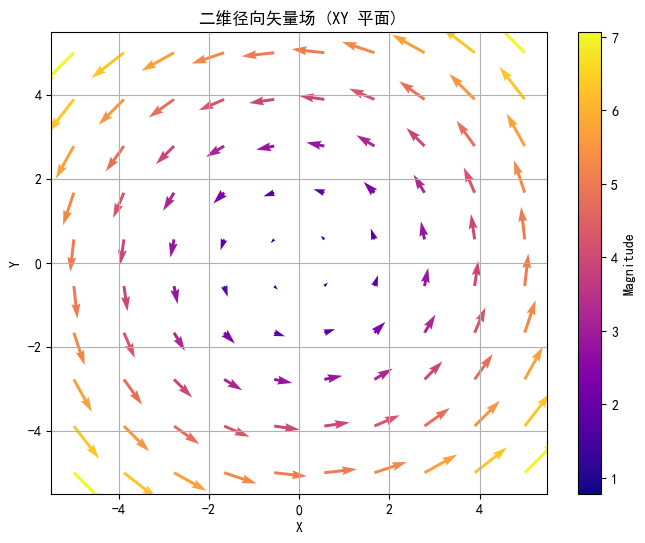

In [ ]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = -N.y * N.i + N.x * N.j + 0 * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    curl_A = curl(A)
    # 输出散度
    print("矢量场的旋度 (∇×A):")
    display(curl_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(1, 1, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

矢量场：


(-N.y)*N.i + N.x*N.j

矢量场的旋度 (∇×A):


2*N.k

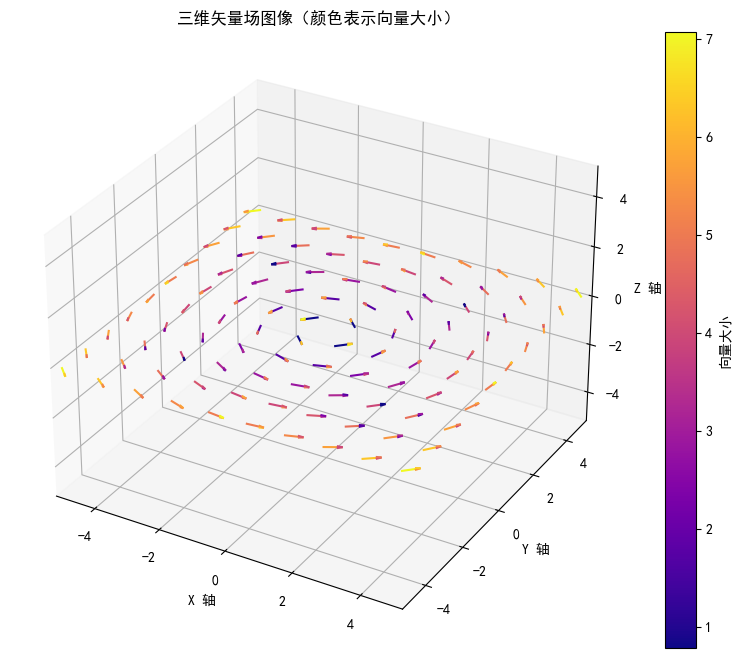

In [6]:
#### 绘出其三维图像

import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = -N.y * N.i + N.x * N.j + 0 * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    curl_A = curl(A)
    # 输出散度
    print("矢量场的旋度 (∇×A):")
    display(curl_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.show()

矢量场：


(-N.y)*N.i + N.x*N.j

矢量场的旋度 (∇×A):


2*N.k

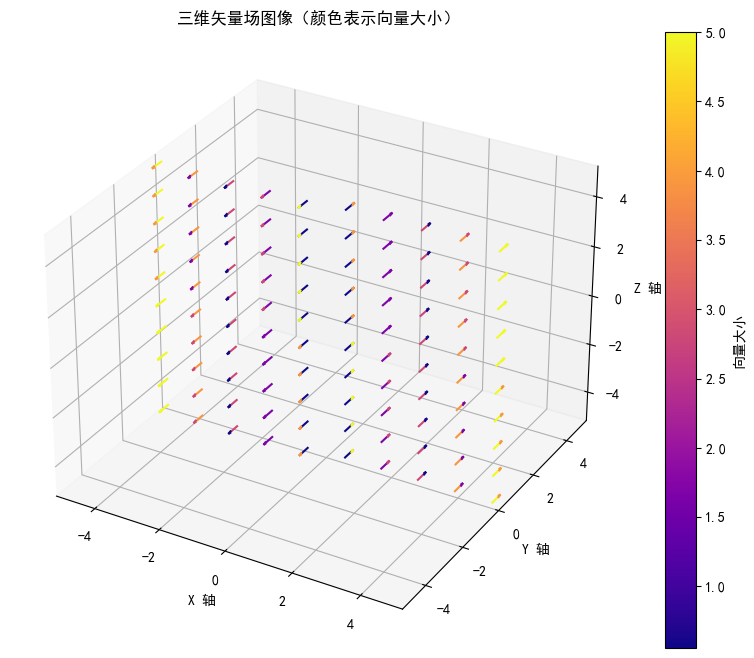

In [ ]:
#### 绘出其三维图像

import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = -N.y * N.i + N.x * N.j + 0 * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    curl_A = curl(A)
    # 输出散度
    print("矢量场的旋度 (∇×A):")
    display(curl_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(0, 0, 1)
z = np.linspace(-5, 5, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.show()

### 矢量场散度的例子：跨越边界线反转方向的矢量场

In [11]:
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display
# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义矢量场 A
# 假设 A = x^2 * i + y^2 * j + z * k
A = 0 * N.i + N.x * N.j + 0 * N.k
print("矢量场 A:")
display(A)

# 计算矢量场的散度
curl_A = curl(A)

# 输出散度
print("矢量场的旋度 (∇×A):")
display(curl_A)

矢量场 A:


N.x*N.j

矢量场的旋度 (∇×A):


N.k

#### 绘出二维矢量图

矢量场：


N.x*N.j

矢量场的旋度 (∇×A):


N.k

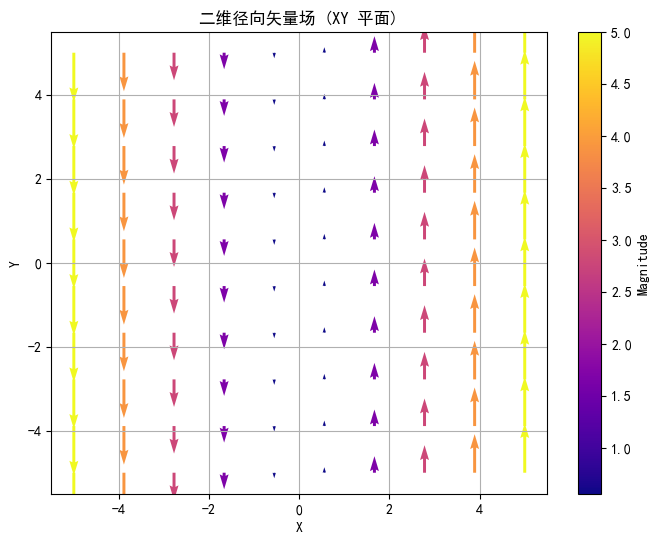

In [12]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = 0 * N.i + N.x * N.j + 0 * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    curl_A = curl(A)
    # 输出散度
    print("矢量场的旋度 (∇×A):")
    display(curl_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(1, 1, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

#### 绘出三维图像

矢量场：


N.x*N.j

矢量场的旋度 (∇×A):


N.k

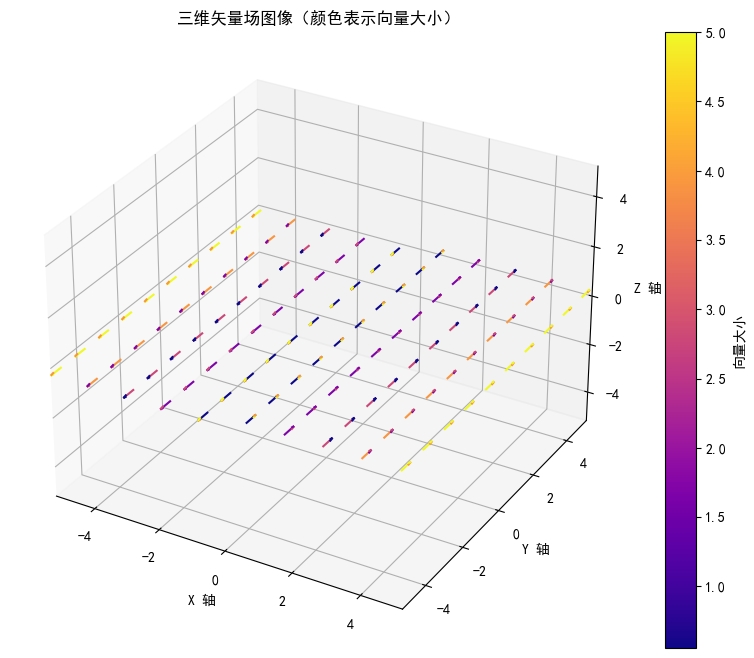

In [ ]:
#### 绘出其三维图像

import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = 0 * N.i + N.x * N.j + 0 * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    curl_A = curl(A)
    # 输出散度
    print("矢量场的旋度 (∇×A):")
    display(curl_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.show()

矢量场：


N.x*N.j

矢量场的旋度 (∇×A):


N.k

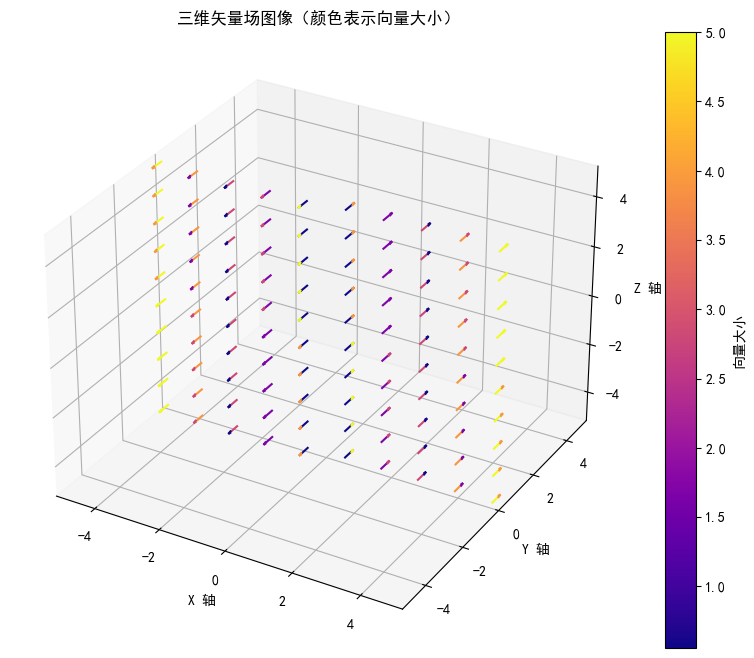

In [2]:
#### 绘出其三维图像

import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = 0 * N.i + N.x * N.j + 0 * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    curl_A = curl(A)
    # 输出散度
    print("矢量场的旋度 (∇×A):")
    display(curl_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(0, 0, 1)
z = np.linspace(-5, 5, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.show()

## 计算抽象函数的旋度

In [ ]:
import sympy as sp
from sympy.vector import CoordSys3D, curl
from sympy import Function
from IPython.display import display

# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义抽象的向量场 A(x, y, z)
A_x, A_y, A_z = Function('A_x')(N.x, N.y, N.z), Function('A_y')(N.x, N.y, N.z), Function('A_z')(N.x, N.y, N.z)
A = A_x*N.i + A_y*N.j + A_z*N.k  # 抽象向量场 A
print("标量场 f:")
display(f)
print("矢量场 A:")
display(A)

# 旋度运算
curl_A = curl(A)  # 使用 ^ 运算符进行旋度计算
print("\n旋度 (∇×A):")
display(curl_A)

标量场 f:


f(N.x, N.y, N.z)

矢量场 A:


(A_x(N.x, N.y, N.z))*N.i + (A_y(N.x, N.y, N.z))*N.j + (A_z(N.x, N.y, N.z))*N.k


旋度 (∇×A):


(-Derivative(A_y(N.x, N.y, N.z), N.z) + Derivative(A_z(N.x, N.y, N.z), N.y))*N.i + (Derivative(A_x(N.x, N.y, N.z), N.z) - Derivative(A_z(N.x, N.y, N.z), N.x))*N.j + (-Derivative(A_x(N.x, N.y, N.z), N.y) + Derivative(A_y(N.x, N.y, N.z), N.x))*N.k